## 1 - 시뮬레이션 초기화
**1) 모델 파라메터 설정** 

- 차 수       : ORDER = 5
- 윈도우 크기 : window = 12
- 지연시간    : delay = 5


- 전달함수 변수
 1. Transfer_Function_Value1 = 1., -3.98454312, 6.43486709, -5.25361517, 2.16513291, -0.359928245
 2. Transfer_Function_Value2 = 0.000059795780369994, 0.000298979, 0.000597958, 0.000597958, 0.000298979, 0.000059795780369994
 
 
**2) csv 파일 로드**
- csv 파일명 : 직접 입력


**3) 인덱스 설정**
- 모듈의 갯수 : 직접 입력


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns # Pairplot

import copy

# Zero phase filtering Parameter
ORDER = 5
window = 12
delay = 5

np_ZEP = window + 10 * ORDER

Transfer_Function_Value1 = np.array([1., -3.98454312, 6.43486709, -5.25361517, 2.16513291, -0.359928245])
Transfer_Function_Value2 = np.array([0.000059795780369994, 0.000298979, 0.000597958, 0.000597958, 0.000298979, 0.000059795780369994])

# 열의 갯수
columns_N = 1

# 읽어올 csv 파일의 경로 설정
df_Data = pd.DataFrame()
df_Data = pd.read_csv('./data/190805_RSSI/190131_RSSI data.csv', encoding='CP949')



# 읽어온 csv 데이터의 인덱스 확인
print('데이터 전체 인덱스 : ', df_Data.columns)
print('  ')

# csv 파일에서 데이터와 테스트 포인트 구분
#
# ex) 아래와 같이 인덱스를 읽어왔을 때,
# Index(['Main', 'Sub1', 'Sub2', 'Sub3', 'Sub4', 'Sub5', 'Sub6', 'Sub7', 'Distance', 'Direction'], dtype='object')
#
# Main ~ Sub7 까지는 columns_N 에 입력한 만큼 cols_Module에 인덱스를 저장함.
# 단, 데이터를 측정했던 testpoint는 따로 지정해줘야함.
#
# 위 데이터에서는 testpoint(fix)가 testpoint 역할을 하므로 df_Data.columns[columns_N:columns_N+1] 로 위치(9번째)를 지정함.
#
# testpoint(fix) 는 고정 사용
#

cols_Module = df_Data.columns[0:columns_N]
row_testpoint = df_Data.columns[columns_N:columns_N+1]

# Check
print('데이터 열의 인덱스 : ', cols_Module)
print('데이터 행의 인덱스 : ', row_testpoint)

데이터 전체 인덱스 :  Index(['Connected Time(ms)', 'testpoint(fix)'], dtype='object')
  
데이터 열의 인덱스 :  Index(['Connected Time(ms)'], dtype='object')
데이터 행의 인덱스 :  Index(['testpoint(fix)'], dtype='object')


In [314]:
# 퀄컴 프로그래머스 문제 3번

In [384]:
image = [[1,1,0,1,1],[0,1,0,1,1],[1,0,0,0,1],[1,1,0,1,0]]

In [343]:
image[0][2]

0

In [403]:
def solution(image):
    
    box_h = []
    box_v = []
    w = len(image[0])
    h = len(image)
    
    h_len = 0
    v_len = 0
    overlap = 0
    a = 0
    
    # 가로로 1이 연속하는 박스 
    for i in range (0,h):
        for j in range (0,w-1):
            if 1 == image[i][j] == image[i][j+1]:
                box_h.append([i,j])
                box_h.append([i,j+1])
                
    # 세로로 1이 연속하는 박스 
    for i in range (0,h-1):
        for j in range (0,w):
            if 1 == image[i][j] == image[i+1][j]:
                box_v.append([i,j])
                box_v.append([i+1,j])
                
    h_len = len(box_h)
    v_len = len(box_v)
                
    # 가로 박스와 세로 박스의 위치가 같을 경우 박스의 갯수 -1
    box_h = set(box_h) # 중복값 제거
    box_v = set(box_v)
    
    for i in range (0,len(box_h)):
        for j in range (0,len(box_v)):
            if box_h[i] == box_v[j]:
                overlap += 1
    
    a = int((h_len+v_len)/2 - overlap)
    
    answer = a
    
    print('w = ',w)
    print('h = ',h)
    print('box_h = ',box_h)
    print('box_v = ',box_v)
    print('h_len = ',h_len)
    print('v_len = ',v_len)
    print('overlap_box_h = ',overlap_box_h)
    print('overlap_box_v = ',overlap_box_v)
    print('overlap = ',overlap)
    
    return answer

In [404]:
solution(image)

TypeError: unhashable type: 'list'

In [ ]:
# 퀄컴 프로그래머스 문제 2번

In [310]:
w = 7
h = 8

In [311]:
# 최대공약수 - 유클리드 호제법
def gcd(a, b):
    mod = a%b
    while mod > 0:
        a = b
        b = mod
        mod = a%b
    return b

In [312]:
def solution(w,h):
    
    a = 0
    GCD = 0
    
    GCD = gcd(w,h)
    
    # w:h를 최대공배수로 나눈 배율에서 나오는 unit 단위의 규칙을 수식으로 재정립 후 전체 계산에 적용하는 공식
    #a = w*h - GCD*(w/GCD + h/GCD - 1)
    a = w*h - (w + h - GCD)
    
    answer = a
    
    print('GCD = ',GCD)
    
    return answer

In [313]:
solution(w,h)

GCD =  1


42

In [ ]:
# 퀄컴 프로그래머스 문제 1번

In [261]:
v = [[1, 5], [3, 4], [3, 10]]
k = 2

v2 = [4, 5, 2]

In [262]:
def solution(v, k):
    
    l = len(v)
    v_out = [] 
    
    # 최고 기록 저장
    for i in range (0,l):
        v[i] = max(v[i])
        
    # 정렬 및 k개를 제외한 숫자 제외
    v_maxin = v
    v_sort = sorted(v)
    v_sort.reverse()
    v_sort = v_sort[0:k]
    
    # 참가번호를 오름차순으로 저장
    for i in range (0,l):
        for j in range (0,k):
            if (v_maxin[i] == v_sort[j]):
                v_out.append(i+1)
    
    answer = v_out

    print('v_maxin = ',v_maxin)
    print('v_sort = ',v_sort)
    print('l = ',l)

    return answer

In [257]:
def solution(v, k):
    
    l = len(v)
    v_out = []
    
    for i in range (0,l):
        v[i] = max(v[i])
    
    v_maxin = v
    
    v_sort = sorted(v)
    v_sort.reverse()
    v_sort = v_sort[0:k]
    
    #v_out = sorted(v_sort)
    
    # 참가번호를 오름차순으로 저장
    for i in range (0,l):
        for j in range (0,k):
            if (v_maxin[i] == v_sort[j]):
                v_out.append(i+1)
    
    answer = v_out

    print('v_maxin = ',v_maxin)
    print('v_sort = ',v_sort)
    print('l = ',l)

    return answer

In [263]:
solution(v, k)

v_maxin =  [5, 4, 10]
v_sort =  [10, 5]
l =  3


[1, 3]

## 2 - Dataset 생성

   Connected Time(ms)
0                 609
1                 538
2                 591
3                 558
4                 536
      Connected Time(ms)
2495                4581
2496                4564
2497                4576
2498                2425
2499                4589
   Connected Time(ms)
0                 609
1                 538
2                 591
3                 558
4                 536
      Connected Time(ms)
2495                4581
2496                4564
2497                4576
2498                2425
2499                4589


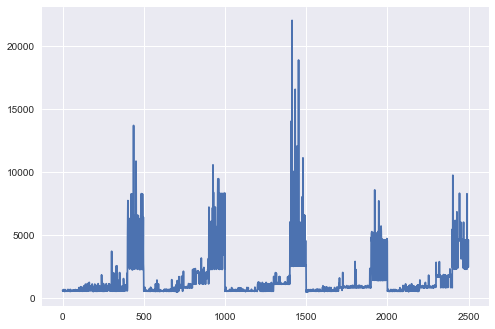

데이터 행 갯수: 2500
실제 필터링 데이터 행 갯수 : 2489


In [8]:
#train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

X_Data = df_Data[cols_Module] 
X_Ideal_Data = df_Data[cols_Module]
X_row_Data = df_Data[row_testpoint]

X_count_row = X_row_Data.shape[0]

df_X_Data = pd.DataFrame(np.array(X_Data), columns=[cols_Module])
df_X_Ideal_Data = pd.DataFrame(np.array(X_Ideal_Data), columns=[cols_Module])
df_X_row_Data = pd.DataFrame(np.array(X_row_Data), columns=[row_testpoint])

y_ZEP_1st = pd.DataFrame(np.zeros((np_ZEP, columns_N)), columns=[cols_Module])
y_ZEP_2nd = pd.DataFrame(np.zeros((np_ZEP, columns_N)), columns=[cols_Module])


# 함수 삽입 전 np.array 데이터 형식으로 변환
# 각도 테스트(B필러 외부) 영위상 필터링 적용

X = np.array(df_X_Data)
X_row_Data = np.array(X_row_Data)

X_Input = np.zeros((np_ZEP, columns_N))
y_ZEP_result_temp = np.array(X)
y_ZEP_result = np.array(X)

Transfer_Function_Value1 = np.array(Transfer_Function_Value1)
Transfer_Function_Value2 = np.array(Transfer_Function_Value2)

y_ZEP_1st = np.array(y_ZEP_1st)
y_ZEP_2nd = np.array(y_ZEP_2nd)

#zero_window = np.zeros((X_count_row,1))
df_zero_window = pd.DataFrame(np.zeros((1,1)), columns=['testpoint(fix)'])
window_jump = 0
p = 0
# Correction_value = 2
# 보정값
Correction_value = 100/96



# Check
print(X_Data.head())
print(X_Ideal_Data.tail())
print(df_X_Data.head())
print(df_X_Ideal_Data.tail())

# Show all data
plt.plot(X_Data)
plt.show()

print('데이터 행 갯수: %.f' %X_count_row)

# 필터링 되는 데이터의 수 = 전체 데이터 수 +1 - 윈도우 사이즈 
# 처음 윈도우 사이즈를 채우기 위한 11개의 데이터는 필터링이 되지 못함
# 따라서 윈도우를 채우기 위해 사용된 앞 11개의 데이터는 12~22번째 데이터로 저장함.
print('실제 필터링 데이터 행 갯수 : %.f' %(X_count_row+1 - 12))

## 3 - 영위상(Zero phase) 필터링

In [9]:
# 영위상(Zero phase) 필터링
# - 신호 지연 현상 감쇄를 위해 사용
def zerophase_filter(ORDER, Transfer_Function_Value1, Transfer_Function_Value2, np_ZEP, X, y_ZEP):
    """
    ORDER = 5   
    Transfer_Function_Value1
    Transfer_Function_Value2
    np_ZEP = window + 10 * ORDER  # 필터링할 데이터 길이
    X = 1st filt : rawdata_window[j] -> 2nd filt : zero_phase_result[j]
    """    
 
    y_ZEP[0:1] = Transfer_Function_Value2[0:1] * X[0:1]
    for i in range (1, ORDER + 1):
        y_ZEP[i:i+1] = 0
        
        #for j in range (i):
        for j in range (i + 1):
            y_ZEP[i:i+1] = y_ZEP[i:i+1] + Transfer_Function_Value2[j:j+1] * X[i - j:i - j +1]
            
        #for j in range (i - 1):
        for j in range (i):
            y_ZEP[i:i+1] = y_ZEP[i:i+1] - Transfer_Function_Value1[j + 1:j + 2] * y_ZEP[i - j - 1:i - j]

    # ORDER + 1 부터 np_ZEP까지 계산하라.         
    for i in range (ORDER + 1, np_ZEP + 1):
        y_ZEP[i:i+1] = 0
        
        #for j in range (ORDER):
        for j in range (ORDER + 1):
            y_ZEP[i:i+1] = y_ZEP[i:i+1] + Transfer_Function_Value2[j:j+1] * X[i - j:i - j +1]
            
        #for j in range (ORDER - 1):
        for j in range (ORDER):
            y_ZEP[i:i+1] = y_ZEP[i:i+1] - Transfer_Function_Value1[j + 1:j + 2] * y_ZEP[i - j - 1:i - j]

            
def filtfilt(ORDER, Transfer_Function_Value1, Transfer_Function_Value2, np_ZEP, X, y_ZEP_1st, y_ZEP_2nd):
    
    zerophase_filter(ORDER, Transfer_Function_Value1, Transfer_Function_Value2, np_ZEP, X, y_ZEP_1st)
    
    y_ZEP_1st = np.array(y_ZEP_1st)
    y_ZEP_1st_out = np.array(y_ZEP_1st)
    
    for i in range (np_ZEP):
        y_ZEP_1st_out[i:i+1] = y_ZEP_1st[np_ZEP - i - 1:np_ZEP - i]
        
    #y_ZEP_1st_out = pd.DataFrame(np.array(y_ZEP_1st_out), columns=['ToF1_Main', 'ToF2_Sub5', 'ToF3_Sub6', 'ToF4_Sub7'])
    
    zerophase_filter(ORDER, Transfer_Function_Value1, Transfer_Function_Value2, np_ZEP, y_ZEP_1st_out, y_ZEP_2nd)
    
    y_ZEP_2nd = np.array(y_ZEP_2nd)
    y_ZEP_2nd_out = np.array(y_ZEP_2nd)
    
    for i in range (np_ZEP):
        y_ZEP_2nd_out[i:i+1] = y_ZEP_2nd[np_ZEP - i - 1:np_ZEP - i]    
        
    #y_ZEP_2nd_out = pd.DataFrame(np.array(y_ZEP_2nd_out), columns=['ToF1_Main', 'ToF2_Sub5', 'ToF3_Sub6', 'ToF4_Sub7'])
    
    # 이론값 : y_ZEP_2nd_out[window - 1 - delay]
    # 위 이론값 주소 표현 : y_ZEP_2nd_out[window - 1 - 1] #딜레이 파트 삭제: 딜레이가 보정되는 현상이 생겨 이를 제거하기 위함.
    return y_ZEP_2nd_out[window - 2 - delay]
    #return y_ZEP_2nd_out
    

## 4 - 필터링 실행

[[ 필터링 완료 ]]
 
[ 각 testpoint 시작지점 ]
[   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400]
 
[ 필터링 전 ]


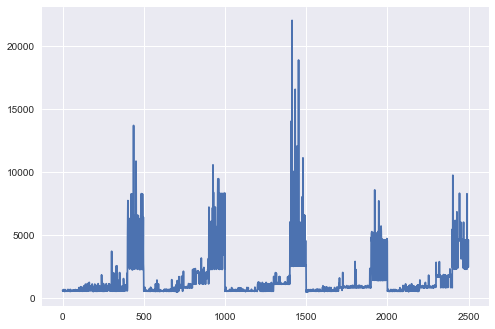

[ 필터링 후 ]


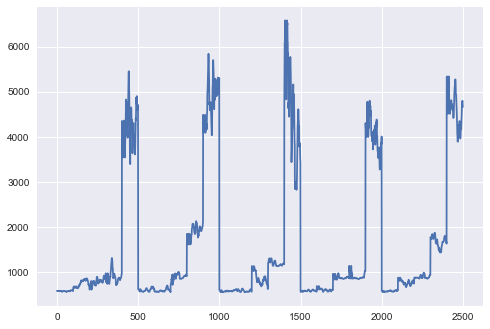

[ 필터링된 데이터 ]


,Connected Time(ms)
0,578
1,577
2,575
3,571
4,572
5,575
6,578
7,579
8,575
9,578


In [10]:
# X_count_row 의 열을 가진 데이터에서
# 데이터 측정지점의 변화를 감지하여 해당지점부터 다시 필터링 시작
# 윈도우를 채우기 위해 사용된 앞 11개의 데이터는 12~22번째 데이터로 저장함.

for i in range ((X_count_row+1) - window):
    
    # 윈도우 사이즈(12개) 만큼의 데이터가 쌓인 후 필터링 실행
    for j in range (window):
        k = i + j
        X_Input[j:j + 1] = X[k:k + 1]            
    
    # X_count_row 인덱스가 바뀌기 전까지 필터링을 실행
    # 필터링 오차 보정값(Correction_value) = -2
    #if (k-1)%100 > 10:
    if X_row_Data[k:k+1] == X_row_Data[k-1:k]:
        if (window_jump == 0):
            y_ZEP_result_temp[i + window - 1 :i + window] = filtfilt(ORDER, Transfer_Function_Value1, Transfer_Function_Value2, np_ZEP, X_Input, y_ZEP_1st, y_ZEP_2nd) 
            
            y_ZEP_result[i + window - 1 :i + window] = y_ZEP_result_temp[i + window - 1 :i + window] * Correction_value
            
            # 필터링값 보정 시퀀스
            #if (y_ZEP_result_temp[i + window - 1 :i + window] > 0):
            #    y_ZEP_result[i + window - 1 :i + window] = y_ZEP_result_temp[i + window - 1 :i + window] + Correction_value
            
            #elif (y_ZEP_result_temp[i + window - 1 :i + window] < 0):
            #    y_ZEP_result[i + window - 1 :i + window] = y_ZEP_result_temp[i + window - 1 :i + window] - Correction_value
                
            #else:
            #    y_ZEP_result[i + window - 1 :i + window] = y_ZEP_result_temp[i + window - 1 :i + window]
                
        # 윈도우 사이즈가 채워질때까지 점프
        elif (window_jump > 0): 
            window_jump = window_jump - 1
            #y_ZEP_result[i - window: i - window + 1] = y_ZEP_result[i : i + 1] 
                    
    # 인덱스가 바뀔 경우 해당 행 번호를 저장
    elif X_row_Data[k:k+1] != X_row_Data[k-1:k]:
        df_zero_window = df_zero_window.set_value(len(df_zero_window), 'testpoint(fix)', k)
        
        window_jump = window - 1
        
        # Start_row 지점 저장
        #Start_row = list(map(int, np.array(df_zero_window[1:2])))
        #p = p + 1
        #y_ZEP_result[Start_row : Start_row + 12] = y_ZEP_result[Start_row + 12 : Start_row + 24]   

        #Start_row = np.int64(pd.to_numeric(df_zero_window['Distance']))
        #y_ZEP_result[Start_row[0] : Start_row[0] + 12] = y_ZEP_result[Start_row[0] + 12 : Start_row[0] + 24]   

        #Start_row = np.int64(df_zero_window)
        #Start_row
        #y_ZEP_result[Start_row[0] : Start_row[0] + 12] = y_ZEP_result[Start_row[0] + 12 : Start_row[0] + 24]   
        #Start_row = np.int64(pd.to_numeric(df_zero_window['Distance']))
        Start_row = np.int64(pd.to_numeric(df_zero_window['testpoint(fix)']))
        
        # 윈도우 사이즈가 채워진 후
        # 계산되지 않은 11개의 데이터를 12~22번째 데이터로 채워줌
        y_ZEP_result[Start_row[p] : Start_row[p] + window] = y_ZEP_result[Start_row[p] + window : Start_row[p] + window + window]
        p = p + 1
        
# 마지막 구간의 윈도우를 채우기 위해 사용된 앞 11개의 데이터는 12~22번째 데이터로 저장하는 부분
y_ZEP_result[Start_row[p] : Start_row[p] + window] = y_ZEP_result[Start_row[p] + window : Start_row[p] + window + window]



# 필터링 완료
print('[[ 필터링 완료 ]]')
print(' ')

# testpoint에서 100개씩 동일하게 측정하지 않았을 지라도
# 아래 Start_row 지점을 기억하여 각자 필터링 시퀀스를 수행함.
print('[ 각 testpoint 시작지점 ]')

Start_row = np.int64(pd.to_numeric(df_zero_window['testpoint(fix)']))
print(Start_row)
print(' ')

# pandas dataframe
# X_ZEP에 y_ZEP_result[window - 1 - delay] 값을 저장
# 필터링은 로우데이터로만 필터링함.
y_ZEP_result = pd.DataFrame(y_ZEP_result, columns=[cols_Module])

# 필터링 전
print('[ 필터링 전 ]')
plt.plot(X_Data)
plt.show()

# 필터링 후
print('[ 필터링 후 ]')
plt.plot(y_ZEP_result)
plt.show()

print('[ 필터링된 데이터 ]')
y_ZEP_result

In [11]:
# boxflot에 사용하기 위한 형식으로 인덱스 변환 작업
# (1) 데이터 측정 위치가 바뀐 지점
# (2) 전체 데이터 측정 위치(열)의 갯수
df_zero_window = df_zero_window.set_value(len(df_zero_window), 'testpoint(fix)', X_count_row) # 마지막 값 보정
df_zero_window = np.array(df_zero_window)
df_zero_window_count= df_zero_window.shape[0]
df_zero_window = list(map(int, df_zero_window))

# 이 구문은 1회만 실행 할 것.
# 에러 발생 시 재시작

## 5 - 데이터 저장

In [12]:
# 필터링 데이터 저장
y_ZEP_result.to_csv("data_ZEP.csv", mode='w')

# columns_N 갯수 만큼 DataFrame 선언
for i in range(columns_N):
    globals()['boxflot_para_nonfilt{}'.format(i)] = pd.DataFrame(np.zeros((8,1)), index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    globals()['boxflot_para_ZEP{}'.format(i)] = pd.DataFrame(np.zeros((8,1)), index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    
    # df_zero_window_count 수 만큼의 영역의 boxflot 파라메터 계산 후 Dataframe 에 저장   
    for j in range (df_zero_window_count):
        globals()['boxflot_para_nonfilt{}'.format(i)][j] = X_Data.loc[df_zero_window[j-1]:df_zero_window[j]-1, y_ZEP_result.columns[i:i+1]].describe()
        globals()['boxflot_para_ZEP{}'.format(i)][j] = y_ZEP_result.loc[df_zero_window[j-1]:df_zero_window[j]-1, y_ZEP_result.columns[i:i+1]].describe()
        
    globals()['boxflot_para_nonfilt{}'.format(i)] = globals()['boxflot_para_nonfilt{}'.format(i)].T
    globals()['boxflot_para_ZEP{}'.format(i)] = globals()['boxflot_para_ZEP{}'.format(i)].T
    
    # csv 파일로 저장
    globals()['boxflot_para_nonfilt{}'.format(i)].to_csv("%s.csv" %'boxflot_para_nonfilt{}'.format(i), mode='w')
    globals()['boxflot_para_ZEP{}'.format(i)].to_csv("%s.csv" %'boxflot_para_ZEP{}'.format(i), mode='w')
       